# **Simplifying the Development of LLM-powered Applications with Langchain**

Having learnt about the usage of the OpenAI API, this notebook introduces LangChain. LangChain is
an open source framework for **simplifying the development of applications** powered by **large language models (LLMs)**.

It provides a set of tools and abstractions to make it easier to build complex workflows, integrating LLMs with external data sources, APIs, and databases.



## **Using LangChain with OpenAI**

In a first step we will explore how to use LangChain with OpenAI.

To get started we install the **LangChain library** and its **OpenAI-specific integrations** in your Python environment.

In [ ]:
!pip install -qU langchain-openai langchain langchain_community

## **Securely Handling Sensitive Data in Colab**

To use OpenAI's GPT models the API key needs to be set up.


When working with sensitive information like API keys or passwords in Google Colab, it's crucial to handle data securely. Two common approaches for this are using **Colab's Secrets Manager**, which stores and retrieves secrets without exposing them in the notebook, and `getpass`, a Python function that securely prompts users to input secrets during runtime without showing them. Both methods help ensure your sensitive data remains protected.

### **Option 1: Using Google Colab Secrets Manager**

Google Colab provides an integrated Secrets Manager, allowing you to securely store and retrieve sensitive information such as API keys or authentication tokens without hardcoding them in your notebook.

**Step 1: Store Your Secret in Colab**

1.   In the Colab notebook, navigate to the left sidebar.
2.   Click on the **“Secrets”** tab (represented by a key icon).
3. Add your secret by clicking on **“+ Add a new secret”**. For example, you might add a secret called `OPENAI_API_KEY` with the value of your API key.

**Step 2: Access the Secret in Your Notebook**

Once you've added a secret, you can easily access it from within the notebook.

`OPENAI_API_KEY` is the name of the secret you've added in the Colab Secrets Manager. It will be retrieved securely without having to expose the key in the notebook.


In [ ]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

### **Option 2: Using Python's `getpass` for Secret Input**

Alternatively, the `getpass` module allows you to securely input secrets (e.g., passwords or API keys) during runtime, making sure they're not visible in the notebook output.

Here, the `getpass.getpass` function prompts the user to enter the secret without displaying it as they type, ensuring that sensitive data isn't exposed.

In [ ]:
import getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass()

## **Setting Up OpenAI in LangChain: Configuring GPT Models for Language Processing**

We then create an instance of ChatOpenAI from LangChain's built-in LLM integrations (`gpt4o_mini_temp_high`), specifying the `model` (e.g., `gpt-4o-mini`) and other parameters like `temperature` (which controls randomness).


In [ ]:
# Step 1: Set up OpenAI LLM
from langchain_openai import ChatOpenAI
gpt4o_mini_temp_high = ChatOpenAI(temperature=0.9, model="gpt-4o-mini")

Then we call the `invoke` method of the `gpt4o_mini_temp_high` (large language model) object to generate a `response` based on the provided prompt. The prompt is "*Tell me a Chinese recipe with ingredients: rice, pork, and vegetables in a textual output format"*. The language model processes the prompt and generates a recipe suggestion as its output.

To display the response in a readable form we will again use Markdown.

In [ ]:
from IPython.display import Markdown

In [ ]:
# Step 2: Invoke the LLM
response = gpt4o_mini_temp_high.invoke(
    "Tell me a Chinese recipe with ingredients: rice, pork, and vegetables in a textual output format."
)

display(Markdown(response.content))

## **Prompt Templates: Crafting Flexible and Reusable AI Interactions**

Now let's see how we can **structure and reuse prompts** in a flexible and dynamic way using the Prompt Templates feature in LangChain. Prompt Templates help you standardize inputs to language models by defining **templates** that can be **filled with dynamic variables**. This is particularly useful when you want to create consistent prompts that can be adjusted based on user input or specific tasks.

Let's now explore how to create such a prompt template. For this, we define a simple prompt template using `PromptTemplate`, which will format the string to include dynamic variables (like `cuisine` and `ingredients`).

To identify dynamic variables in the prompt template, we enclose them in curly brackets.

To assign a value to the variables in the prompt template, we use `format` to format the prompt.

In [ ]:
from langchain_core.prompts import PromptTemplate

recipe_prompt_template = PromptTemplate.from_template(
    "Tell me a {cuisine} recipe with ingredients: {ingredients}."
)

recipe_prompt = recipe_prompt_template.format(cuisine="Chinese", ingredients = ["rice", "pork", "vegetables"])

Then we use the LLM to generate a response from the prompt. More specifically, by invoking the llm instance we generate the `response` by passing a formatted prompt `(prompt_template.format(cuisine="Chinese", ingredients = ["rice", "pork", "vegetables"]))` to the model.

In [ ]:
# Step 2: Invoke the LLM
response = gpt4o_mini_temp_high.invoke(recipe_prompt)
display(Markdown(response.content))

## **Chains: The Building Blocks of Dynamic AI Workflows**

For simple and standalone tasks, it makes sense to invoke a formatted prompt (e.g., `recipe_prompt`) directly using the `invoke` method as demonstrated in the previous section.

However, when the prompt is part of a larger workflow or reusability is a concern, **LLMChains** are more suitable. An **LLMChain** in LangChain combines a **PromptTemplate** with a language model (LLM) to dynamically generate outputs, separating prompt construction from LLM invocation. This separation simplifies workflows, enhances modularity, and makes them easier to maintain and reuse.

**LLMChain** is imported to handle the integration between the `PromptTemplate` and the LLM, streamlining the process of running dynamic queries.

In [ ]:
from langchain.chains import LLMChain

The next line creates an `LLMChain` that will format the prompt dynamically using the template and send it to the language model.

* `llm=gpt4o_mini_temp_high:` Refers to the instantiated language model, such as OpenAI(`model="gpt-40-mini"`).

* `prompt=recipe_prompt_template`: Refers to the pre-defined PromptTemplate that contains placeholders for dynamic inputs (e.g., `{cuisine}` and `{ingredients}`).


In [ ]:
# Step 2: Create the LLMChain
chain = LLMChain(llm= gpt4o_mini_temp_high, prompt=recipe_prompt_template)

`chain.invoke(...)`: Fills in the placeholders in the `recipe_prompt_template` with the provided arguments (`{"cuisine": "Chinese", "ingredients": "rice, pork, vegetables"}`) and sends the formatted prompt to the language model for processing. The LLM generates a response (e.g., a recipe), which is stored in the `response` variable which is then displayed.

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"cuisine": "Chinese",
    "ingredients": "rice, pork, vegetables"})

display(Markdown(response["text"]))

### **Sequential Chains: Building Multi-Step AI Workflows with Ease**

**Sequential Chains** extend the functionality of individual LLMChains by linking multiple chains together in a step-by-step workflow. While a single LLMChain connects a prompt template to a model, Sequential Chains enable the output of one chain to feed into the next, creating a pipeline for complex, multi-step tasks. This allows for dynamic and modular workflows, such as generating an idea, refining it into an outline, and producing detailed content—all in one seamless process. By structuring tasks sequentially, Sequential Chains make it easy to handle interdependent operations while maintaining clarity and reusability.

We will now create a sequential chain for recipe generation.

*   **Input Variables:**
  * `cuisine` and `ingredients` are the initial inputs for the sequential chain.

*   **Step 1: Dish Generation**
  * A prompt template (`dish_template`) is created to suggest a dish based on the given cuisine and ingredients.
  * The output of this step is the `dish` name, which will be passed to the next step.

* **Step 2 - Outline Creation:**
 * The output from the first step (`dish`) is passed as an input to the second prompt (`outline_template`), where a step-by-step outline for preparing the dish is created.
 * The output of this step is the `outline`.

* **Step 3 - Recipe Writing:**
  * The output from the second step (`outline`) is used as input in the third prompt (`recipe_template`) to generate a recipe.
  * The output of this step is the `recipe`.

* **Connections:**
  * `cuisine` + `ingredients` → `dish`
  * `dish` → `outline`
  * `outline` → `recipe`

A visualization of this `SequentialChain` (`dish_generation_chain`) is depicted below.

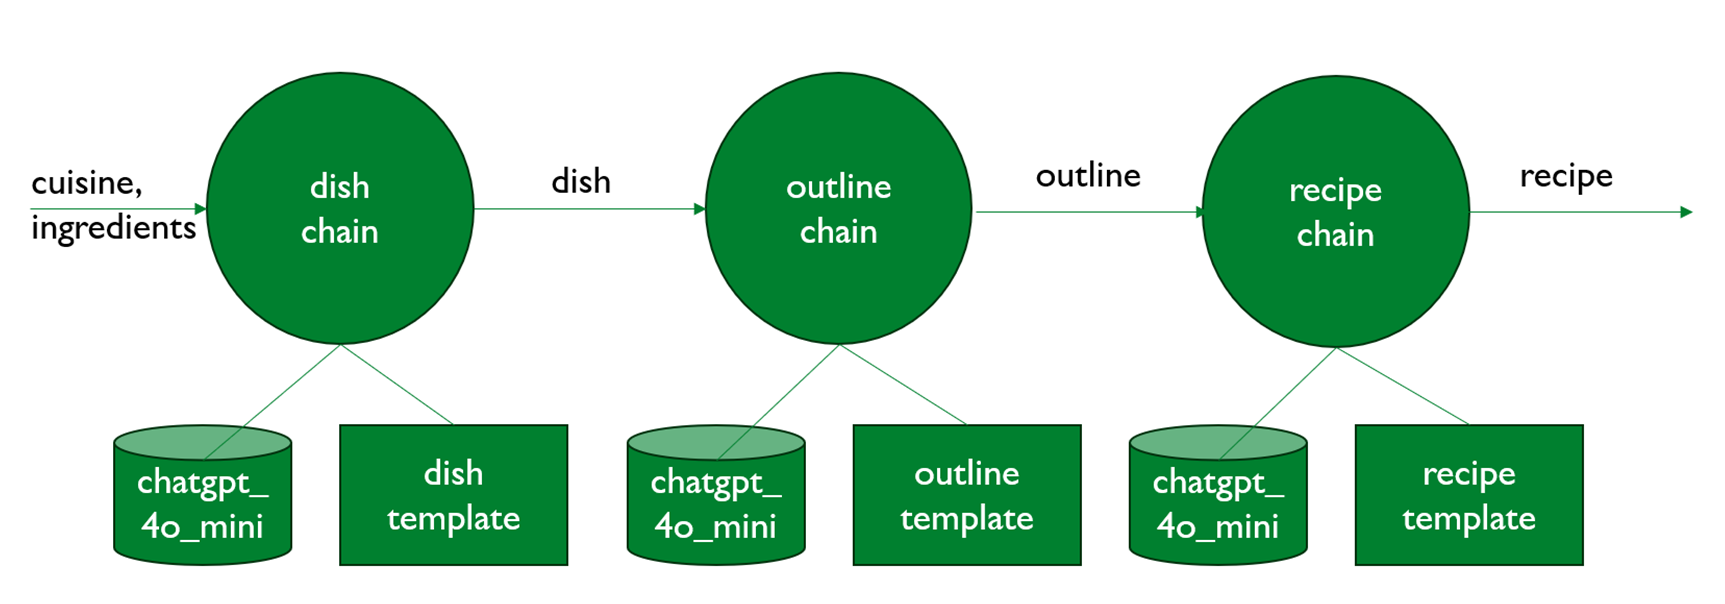

In [ ]:
from langchain.chains import SequentialChain, LLMChain
from langchain.prompts import PromptTemplate
from langchain_openai import OpenAI

# Step 1: Define the LLM
chatgpt_4o_mini = ChatOpenAI(model="gpt-4o-mini", temperature=0, max_tokens=8000)

# Step 2: Create PromptTemplates for Each Step
# First, a prompt template to suggest a dish of a specified cuisine with specified ingredients
dish_prompt = PromptTemplate(
    input_variables=["cuisine", "ingredients"],
    template="Suggest a dish for {cuisine} cuisine using these ingredients: {ingredients}. Provide only the dish name and the ingredients."
)

# Then, a prompt template to create an outline for preparing the suggested dish
outline_prompt = PromptTemplate(
    input_variables=["dish"],
    template="Create a step-by-step outline for preparing the dish: {dish}."
)

# Finally, a prompt template to write a detailed recipe from the generated outline
recipe_prompt = PromptTemplate(
    input_variables=["outline"],
    template="Write a detailed recipe based on the following outline:\n\n{outline}"
)

# Step 3: Create LLMChains for Each Step
dish_chain = LLMChain(llm=chatgpt_4o_mini, prompt=dish_prompt, output_key="dish")
outline_chain = LLMChain(llm=chatgpt_4o_mini, prompt=outline_prompt, output_key="outline")
recipe_chain = LLMChain(llm=chatgpt_4o_mini, prompt=recipe_prompt, output_key="recipe")

# Step 4: Combine Chains into a SequentialChain
dish_generation_chain = SequentialChain(
    chains=[dish_chain, outline_chain, recipe_chain],
    input_variables=["cuisine", "ingredients"],
    output_variables=["dish", "outline", "recipe"]
)

Let's now run the chain for an Italian recipe with tomatoes, basil, mozzarella, and olive oil.

In [ ]:
# Step 5: Run the Chain
response = dish_generation_chain.invoke({
    "cuisine": "Italian",
    "ingredients": "tomatoes, basil, mozzarella, olive oil"
})

In [ ]:
display(Markdown(response["dish"]))

In [ ]:
display(Markdown( response["outline"]))

In [ ]:
display(Markdown(response["recipe"]))

If you are not up for an Italian recipe then just re-run the chain with other input parameters. Notice how you do not need to change anything in the chain definition, but only the input parameters.

In [ ]:
# Step 5 (alternative): Run the Chain
response = dish_generation_chain.invoke({
    "cuisine": "Mexican",
    "ingredients": "tomatoes, cheese, corn tortillas, onions"
})

In [ ]:
display(Markdown(response["dish"]))

In [ ]:
display(Markdown( response["outline"]))

In [ ]:
display(Markdown(response["recipe"]))

## **Optimizing LangChain for Complex Workflows**

### **Customizing LangChain: Model Selection, Prompts, and Multi-Model Integration**

LangChain allows you to customize your application to suit a variety of use cases by offering flexibility in how you configure the models, prompts, and workflow. These customizations help tailor the conversation or task to your specific needs, while also providing the power to work with a range of language models.

* **Model Selection:** You can easily experiment with different models depending on the task. Whether it's **gpt-4o, gpt-4o-mini,** one of the models of **Cohere,** open-source models available at HuggingFace like **DeepSeek, Mistral, Llama**, or even **Google's Gemini**, LangChain makes it simple to switch between models and leverage the unique strengths of each.

* **Prompt Templates:** Modify the **PromptTemplate** to suit your needs. You can adjust the prompt's **style, tone**, and **context** to shape how the model responds. Whether you're generating creative text, answering questions, or summarizing information, customizing the prompt allows for better alignment with your use case.

* **Temperature Control:** Adjust the **temperature** parameter to control the creativity or randomness of the model's response. A lower temperature (e.g., 0.2) results in more deterministic and focused output, while a higher temperature (e.g., 0.8) increases creativity and variability in responses.

* **Unified Interface for Multiple Models:** LangChain's unified interface allows you to **seamlessly switch** between different **language models**, such as OpenAI, Cohere, HuggingFace, and Google Gemini, without needing to rewrite significant portions of your code. This makes it easy to adapt to different models depending on the task, whether you are using OpenAI for text generation, HuggingFace for summarization, or Google's Gemini for specialized tasks.

This flexibility means you can leverage the strengths of multiple models in a single application, combining them in complex workflows. LangChain's abstraction layer ensures that you can switch and combine models easily without making extensive changes to your code, making it a powerful, **model-agnostic framework** that **adapts to** your **evolving needs**.

**Important Note on API Keys:**
API keys are required for each model you use, but they can be obtained for experimentation without any charges. Usage of these models is optional, and you can choose which models to try out based on your preferences and needs.

### **Google Integration with LangChain**

Let's see how easy it is to switch from OpenAI and use the Google Gemini series of models.

#### **Step 1: Get you API Key**

A free Google AI API key can be obtained from: https://ai.google.dev/gemini-api/docs/api-key?hl=de.

You can either store it as new secret (`GOOGLE_API_KEY`) or use the `getpass` module as explained in the section on how to handle sensitive data.

#### **Step 2: Use the API Key**

In [ ]:
# Uncomment when using passcode to be prompted to enter your API Key
# In this case, remember to comment the line for using Colab Secrets Manager
# os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

# When using Colab Secrets Manager: Retrieve Google API key
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

#### **Step 3: Install Google Integration**

In a first step the google integration for LangChain needs to be installed.

In [ ]:
%pip install -qU langchain-google-genai

#### **Step 4: Using Gemini-1.5-Pro to Generate Recipe**


* **Reuse the Original Recipe Prompt Template:** You will use the `recipe_prompt_template` to create a recipe based on `cuisine` and `ingredients`, just as before.

* **Switch Model to gemini-1.5-pro:** Instead of using OpenAI, you will now switch the model to `gemini-1.5-pro`. You can achieve this by adjusting the model initialization to use Gemini.

* **Connect the Prompt Template and Model in a Chain:** You will connect the `recipe_prompt_template` with the `gemini-1.5-pro` model in a LangChain chain, then run the chain to generate a recipe response.


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Step 1: Switch to Google model
google_llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=8000, # max=8192
    timeout=None,
    max_retries=2,
    # other params...
)

# Step 2: Create the LLMChain
chain = LLMChain(llm=google_llm, prompt=recipe_prompt_template)

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"cuisine": "Swiss",
    "ingredients": "rice, pork, vegetables"})

display(Markdown(response["text"]))

### **Cohere Integration with LangChain**

Let's see how easy it is to switch to Cohere.

#### **Step 1: Get you API Key**

A free Cohere API key can be obtained by registring at: https://dashboard.cohere.com/welcome/login.

You can either store it as new secret (`COHERE_API_KEY`) or use the `getpass` module as explained in the section on how to handle sensitive data.

#### **Step 2: Use the API Key**

In [ ]:
# Uncomment when using passcode to be prompted to enter your API Key
# os.environ["COHERE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

# When using Colab Secrets Manager: Retrieve COHERE API key
os.environ["COHERE_API_KEY"] = userdata.get('COHERE_API_KEY')

#### **Step 3: Install Cohere Integration**

In a first step the cohere integration for LangChain needs to be installed.

In [ ]:
pip install -q langchain-cohere

#### **Step 4: Using Cohere to Generate Recipe**

Now that you've worked with Google's Gemini model, let's switch to using Cohere to generate recipes!

The model name for Cohere's text generation is `command-xlarge`, which is available for generating high-quality outputs like recipes.


In [ ]:
from langchain.llms import Cohere

# Step 1: Switch to Cohere model
cohere_model = Cohere(model="command-xlarge", temperature=0.8, max_tokens=4096) # max=4096)

# Step 2: Create the LLMChain
chain = LLMChain(llm=cohere_model, prompt=recipe_prompt_template)

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"cuisine": "Swiss",
    "ingredients": "rice, pork, vegetables"})

display(Markdown(response["text"]))

### **HuggingFace Integration with LangChain**

HuggingFace integration allows us to easily leverage **publicly available pre-trained models** for a variety of tasks without needing to build them from scratch. The HuggingFace [ModelHub](https://huggingface.co/models) offers a vast collection of pre-trained models across a wide range of tasks, including **text generation, classification, translation, summarization**, and more. These models have been trained on large datasets and are optimized for high performance.These models can be used for:

* **Inference:** Applying pre-trained models directly to tasks like text generation, translation, or classification.
* **Fine-tuning:** Adapting models to suit specific applications or datasets.

While pre-trained models from HuggingFace offer **more control and flexibility** than proprietary APIs (since they are open-source), they come with the trade-off that you need **sufficient computational resources** to run them, especially for larger models. The **hardware requirements**—such as GPU and memory—can exceed the capabilities of free-tier services like Colab, making it necessary to use cloud services or powerful local machines for more demanding models.

The **primary advantage** of HuggingFace models is their **open-source nature**, allowing you to **fine-tune** them, **customize** them, and **fully understand their internals**, which isn't possible with closed APIs. However, compared to proprietary APIs like OpenAI, Cohere, or Google Gemini, you will need to manage the **infrastructure** required to run large models or choose to access advanced models via HuggingFace's **Inference API.** By using HuggingFace's Inference API, you can quickly access cutting-edge models without the need for local hardware resources or infrastructure setup.

#### **Using HuggingFace Models for Complex Tasks**

For **complex tasks** like recipe generation, you need models that can handle more sophisticated, nuanced input and generate **coherent, detailed outputs**. Smaller models available in HuggingFace's Model Hub like GPT-2 or other lightweight models often fall short in such scenarios, as they lack the **context retention** and **generation capabilities** required to produce detailed responses for tasks that demand **precision** and **contextual depth**.

In such cases, **larger models** such as DeepSeek, LLama, Mistral (when configured properly) are better suited to the task. These models provide stronger performance in handling complex tasks like recipe generation, where the model needs to understand detailed ingredients, processes, and outputs.

* **DeepSeek:** DeepSeek is known for its ability to handle complex tasks requiring deep contextual understanding and long-term coherence. It excels in generating accurate, contextually relevant outputs, making it well-suited for applications that involve detailed or multi-step processes, such as recipe generation.
* **LLama**: Offers strong performance on tasks like text generation and classification, and excels in handling large input data while producing more contextually detailed outputs.
* **Mistral**: A highly efficient model known for its superior performance on natural language tasks, particularly useful for context retention and coherent generation in complex applications.

To access these models for tasks like recipe generation, it is most practical to use **HuggingFace's Inference API**, which allows you to run these **high-performance models in the cloud** without needing the hardware to support them locally. By accessing the models through the Inference API, you can bypass local infrastructure limitations while still utilizing advanced models like `DeepSeek-R1-Distill-Qwen-32B`, `Mistral-7B-Instruct-v0.3` and meta-llama/`Meta-Llama-3-8B-Instruct`.

#### **Step 1: Setting Up Your HuggingFace Account and Inference API Access**

To access powerful models via the HuggingFace Inference API, you need to create a HuggingFace account, generate an access token, and configure your account properly.

**Step 1.1: Create a HuggingFace Account**

Navigate to https://huggingface.co/ and sign up to create a free account.

**Step 1.2: Generate Your HuggingFace API Access Token**

Login and navigate to your account settings. For this, once logged in, go to your profile (click on your username in the top-right corner) and select **Settings** from the dropdown menu.

* In the **Settings** page, scroll down to the **Access Tokens** section and
* Click **New Token**.
* Choose the **token scope** you need (for Inference API access, you'll need **Read** access).
* Click **Generate Token**.

**Step 1.3: Configure the Access Token in Your Code**

You can either store it as new secret (`HF_TOKEN`) or use the `getpass` module as explained in the section on how to handle sensitive data.

#### **Step 2: Use the API Key**

In [ ]:
# Uncomment when using passcode to be prompted to enter your API Key
# os.environ["HF_TOKEN"] = getpass.getpass("Enter your Google AI API key: ")

# When using Colab Secrets Manager: Retrieve COHERE API key
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

#### **Step 3: Install HuggingFace Integration**

In a first step the HuggingFace integration for LangChain needs to be installed.

In [ ]:
!pip install -q langchain-huggingface

#### **Step 4: Using HuggingFace to Generate Recipes**

In this section, we will use the **HuggingFace integration** to access models for **text generation** via **the Inference API**, specifically through the **HuggingFaceEndpoint**.

You can experiment with different models such as:
* `deepseek-ai/DeepSeek-R1-Distill-Qwen-32B`
* `meta-llama/Meta-Llama-3-8B-Instruct`
* `mistralai/Mistral-7B-Instruct-v0.3`.

**Important Notes on Model Access:**
**Gated Models:** Some models, such as Llama or Mistral variants, are gated. This means that to gain access to them, you may need to provide additional information, such as sharing your contact details or submitting a request for access.

**Pro Account Requirement:** Certain large models, including some advanced versions of  LLama (e.g.,
`meta-llama/Llama-3.3-70B-Instruct`), may require a HuggingFace Pro account due to their high computational demands or not even be available via the inference API (e.g., `deepseek-ai/DeepSeek-R1` or `mistralai/Mistral-Large-Instruct-2411`) and require other inference providers.



In [ ]:
from langchain_huggingface import HuggingFaceEndpoint

#Step 1: Switch to HF
hf = HuggingFaceEndpoint(
    repo_id=
    #"meta-llama/Llama-3.3-70B-Instruct", #only with HuggingFace ProAccount
    #"deepseek-ai/DeepSeek-R1-Distill-Qwen-32B", #in principle works with free HuggingFace account if model not too busy;
    #"meta-llama/Meta-Llama-3-8B-Instruct", #gated model, works with free HuggingFace account and requires that you provide your data
    "mistralai/Mistral-7B-Instruct-v0.3",  #gated model, works with free HuggingFace account and requires that you provide your data
    task="text-generation",
    max_new_tokens=8000,
    do_sample=False,
)

In [ ]:
# Step 2: Create the LLMChain
chain = LLMChain(llm=hf, prompt=recipe_prompt_template)

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"cuisine": "Swiss",
    "ingredients": "rice, pork, vegetables"})

display(Markdown(response["text"]))

## **Accessing and Integrating External Data Using Data Loader**

This section introduces another core component of LangChain: **Data Loader**. They play a crucial role in the framework by providing a way to load and process **data from external sources** (such as files, databases, or APIs) into a format that can be used by LangChain models and tools.


### **Types of Loaders**

LangChain provides several types of loaders such as:

*   File-based loaders (e.g., `PDFLoader`, `CSVLoader`)
*   Web-based loaders (e.g., `WebBaseLoader`, `WikipediaLoader`, `YoutubeLoader`)
*   API loaders
*   Database loaders



While these loaders handle different data sources, they output content in a consistent format (documents) for use in LangChain workflows.
This consistency allows you to easily integrate diverse data into tasks like:
* Summarization
* Question answering
* Semantic search
* Data analysis

### **Loading and Preprocessing CSV Files**

This section shows how to use the `CSVLoader`. This module is from the `langchain_community library`. It's a loader specifically designed to load and process CSV files. This allows you to load structured data from a CSV file into a format that can be used for further analysis, such as in document-based tasks.



#### **Loading a Document from a CSV**

`CSVLoader(file_path="/content/sample_data/heart_failure_clinical_records_small.csv")`: initializes the `CSVLoader` with the path to a CSV file (in this case, a dataset related to heart failure clinical records). You can find the file on Canvas.

`loader.load()`: This method loads the content of the CSV file. It reads the file and processes its contents so that it can be used in further analysis. Typically, this would load the CSV data as a list of documents or as a structured data object that can be worked with by the rest of the langchain pipeline.

`docs` is the result of the `loader.load()` function call in your code. In the context of the `CSVLoader`, this would be a list of "documents" loaded from the CSV file. Each document typically represents a row of data or a chunk of the CSV file.

In [ ]:
from langchain_community.document_loaders import CSVLoader

# Load and split the CSV content
loader = CSVLoader(file_path="/content/sample_data/heart_failure_clinical_records_small.csv")
docs = loader.load()

In [ ]:
# prints the content of the CSV file
docs

This code is used to check the type of the `docs` object. It will output the data type of the `docs` variable, which can help you understand what kind of structure it is.   

In [ ]:
type(docs)

`docs[0]`: This accesses the first document in the list of loaded documents. In Python, lists are indexed starting from 0, so `docs[0]` will give you the first element.

`page_content:` The `CSVLoader` returns a list of document objects, where each object has different attributes that represent various parts of the document (e.g., age, anaemia, diabetes, etc.). In this case, page_content would hold the textual information (such as the data of the first row) from the CSV file.

In [ ]:
print(docs[0].page_content)

#### **Using the Loaded Document for Context in LLM Queries**

##### **Using a Prompt Template with OpenAI to Answer Questions Based on Document Content**

The following code snippet defines a prompt template that passes the content of the loaded document to an OpenAI LLM (specifically, GPT-4) to answer questions related to the document.

In [ ]:
from langchain_core.prompts import PromptTemplate

# Step 1: Define the prompt template
doc_prompt_template = PromptTemplate.from_template(
    #"{question} from the attached document: {doc}."
    "Answer {question} based on the provided document: {doc}."
)

This template will take a question and the document content (loaded earlier) and format it to provide context for the LLM.

#####  **Setting Up the Chain and Choosing the Right Model**

After defining the prompt template, the next step is to set up a chain that connects the prompt with the language model (LLM).

It's important to note that instead of using the basic `OpenAI` class, we use `ChatOpenAI` to access the **GPT-4** model. GPT-4 offers **extended context capabilities**, which are necessary to pass the entire document as context. This is particularly important when dealing with larger documents, like CSV files, which may exceed the token limits of smaller models.

By using **ChatOpenAI**, we ensure that the LLM can process the document's full content, enabling it to provide more accurate and relevant answers based on the specific document, rather than relying on general knowledge.

In [ ]:
# Step 2: Set up OpenAI LLM
from langchain_openai import ChatOpenAI
llm_gpt4o = ChatOpenAI(temperature=0, model="gpt-4o")
# alternatively, use "gpt-4o-mini"
chain = LLMChain(llm=llm_gpt4o, prompt=doc_prompt_template)

Now let's try how well the LLM is at answering questions about the provided document.

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"question": "Give me the minimum age","doc": docs})
display(Markdown(response["text"]))

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"question": "Give me the maximum age","doc": docs})
display(Markdown(response["text"]))

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"question": "Count the number of individuals who have diabetes, identified by the 'diabetes' column where the value is 1. Provide the total number and the percentage of diabetic individuals relative to the entire dataset.","doc": docs})
display(Markdown(response["text"]))

##### **Validating Answers with Pandas**

Once you've set up the model and generated answers, you can use **Pandas** to validate and **check the answers** by comparing them against the content of the CSV document.

In [ ]:
import pandas as pd

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/sample_data/heart_failure_clinical_records_small.csv")

# Step 2: Calculate the minimum values for each column
min_values = df["age"].min()
max_values = df["age"].max()
diabetes_count = df[df["diabetes"] == 1].shape[0]
overall_count = df.shape[0]

# Display the minimum values
print(min_values)
print(max_values)
print(diabetes_count)
print(overall_count)

### **Loading and Processing PDF Files**

The next section shows how to load and process PDF Files. It specifically extracts structured data from the PDF and uses a prompt template to retrieve additional information.


We will use the `PyPDFLoader` from the `langchain_community.document_loaders` module to load and process text-based PDF files. It allows you to read PDF content, and you can split the document into separate pages for further processing.


In [ ]:
pip install -q pypdf

##### **Loading a Document from a PDF**

We You can load and split a PDF into individual pages using `PyPDFLoader`.

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/sample_data/class-list-emba-67-fiction.pdf")
pages = loader.load()

Let's extract the content of the first page using `pages[0]`.

In [ ]:
pages[0]

##### **Using LLMS to Extract and Structure Data from PDFs**

To extract data into a more structured manner we create a prompt template. The template takes the unstructured document content as an input (page-wise) and extracts a json document with name, job role, company, and e-mail.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
import json

llm=ChatOpenAI(model="gpt-4o")

template="""
you are an intelligent bot who can analyze any text with course participant information {doc_text} ,
your job is to read and analyse the information and create a json dictionary.
dictionary has the following keys:
Name:
Job Role:
Company:
E-Mail
output must be json nothing else
"""

prompt = PromptTemplate(template=template,input_variables=["doc_text"])

llmchain = LLMChain(llm=llm, prompt=prompt)

participant_data=[]

for page in pages:
    response=llmchain.invoke({"doc_text":page.page_content})
    data=response["text"]
    data=data.replace("json","")
    data=data.replace("`","")
    data=json.loads(data)
    participant_data.append(data)

##### **Enhancing Extracted Data with LLMs: Retrieving Additional Information**

We can define a prompt template and chain to obtain detailed information about the companies in the document.

In [ ]:
from langchain.prompts import PromptTemplate

# Define the prompt template to extract company information
company_info_prompt = PromptTemplate(
    input_variables=["company_name"],
    template="Can you provide some detailed information about the company called '{company_name}'? Include details like its industry, products, and any notable facts except financial aspects in 50 words."
)

# Initialize OpenAI model with your API key
openai_model = OpenAI(temperature=0)

# Initialize the LLMChain with the defined prompt and OpenAI model
llm_chain = LLMChain(prompt=company_info_prompt, llm=openai_model,)

We iterate through the people in the document and run the chain for each of them to obtain the company information.

We print the person details, along with the detailed company information we obtained.

In [ ]:
# Loop through the data and extract useful information
for group in participant_data:
    for person in group:

        # Run the chain with a company name (for example, "Apple")
        response = llm_chain.run({"company_name": {person['Company']}})

        # Print extracted information
        display(Markdown("Name: " + person['Name']))
        display(Markdown("Job Role: " + person['Job Role']))
        display(Markdown("E-Mail: " + person['E-Mail']))
        display(Markdown("Company: " + person['Company']))
        display(Markdown("Company Details: " + response))
        display(Markdown("-" * 40))

##### **Using the Loaded Document for Context in LLM Queries**

Now let's reuse the previously created prompt template to ask questions about the loaded document.

In [ ]:
#Run the Chain
response = chain.run(question="What is the company Tim Apple works for?",doc=participant_data)
display(Markdown(response))

In [ ]:
#Run the Chain
response = chain.run(question="Where is the company Tim Apple works for located?",doc=participant_data)
display(Markdown(response))

### **Loading and Processing Web Content**


To load and process web content, we first import the required libraries

* `WebBaseLoader:` A tool in LangChain to load and parse the content of a web site.
* `load_summarize_chain:` A function to create a summarization workflow using a chain of operations.

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain.chains.summarize import load_summarize_chain

##### **Loading a Document from a Webpage**

The `WebBaseLoader` is initialized with the URL of the webpage you want to load.

In [ ]:
loader = WebBaseLoader("https://www.missmollymac.com/post/the-ultimate-guide-to-big-bend-national-park")


This disables SSL certificate verification. It's useful if the website has an invalid or self-signed SSL certificate.

**Caution:** Disabling SSL verification can expose your system to security risks.

In [ ]:
loader.requests_kwargs = {'verify':False}

Then, `loader.load_and_split()` loads the webpage content using a predefined loader (e.g., `WebBaseLoader` in LangChain) and splits the content into smaller chunks to make it easier to process, especially for long texts.

In [ ]:
# Step 1: Load the Web Content
docs = loader.load_and_split()

##### **Using a Summarizer Chain to Summarize the Content**

Then set up a summarize chain to create a summary of the content.

For this, we set up the largue language model (`llm_gpt_4o_mini = ChatOpenAI(model="gpt-4o-mini", temperature=0`) and we create a summarization chain: `summarize_chain = load_summarize_chain(llm, chain_type="map_reduce")`. This summarization chain uses a map-reduce strategy:
* **Map Step:** Processes chunks of the transcript individually and generates partial summaries.
* **Reduce Step:** Aggregates the partial summaries into a cohesive final summary.

This approach is useful for handling long documents by breaking them into smaller, manageable parts. Finally we run the chain and store the summary in a variable `summary` and print the summary.

In [ ]:
# Set up OpenAI LLM
llm_gpt_4o_mini = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Set up the Summarization Chain
summarize_chain = load_summarize_chain(llm_gpt_4o_mini, chain_type="map_reduce")

# Run the Chain to Summarize
summary = summarize_chain.run(docs)

# Print the Summary
display(Markdown("Summary:"))
display(Markdown(summary))

#### **LLM-based Document Content Cleaning**

In the next step we will use the LLM to clean the document content and remove unwanted characters and whitespaces.

In [ ]:
print(docs)

In [ ]:
# Define the prompt template
cleaning_prompt_template = PromptTemplate(
    input_variables = ["document"],
    template = "Clean the raw text provided in {document} by removing unwanted characters and normalizing whitespace. Replace multiple spaces/newlines with a single space and remove special characters."
)

#Define the llm
#llm = ChatOpenAI(model="gpt-4o", temperature=0.7)
#We reuse the previously defined model llm_gpt_4o_mini

#Define the chain
cleaning_chain = LLMChain(llm=llm_gpt_4o_mini, prompt=cleaning_prompt_template)

#Run the chain
cleaned_documents = cleaning_chain.run(docs)

#Display the cleaned content
display(Markdown(cleaned_documents))

### **Loading and Parsing the Transcript of a YouTube video**

The next example shows how to use the YoutubeLoader to laod and parse the transcript of a YouTube video. The transcript is then summarized.

In [ ]:
%pip install --upgrade --quiet  youtube-transcript-api

First we import the required libraries:
* `YoutubeLoader:` A tool in LangChain to extract and parse transcripts from YouTube videos.

In [ ]:
from langchain.document_loaders import YoutubeLoader

In the next snippet `YoutubeLoader.from_youtube_url(...)` extracts the transcript from the specified YouTube video URL.
Option `add_video_info=False`n determines whether to include metadata (e.g., title, description) about the video. Setting it to `False` means only the transcript is loaded.
Then, `video = loader.load()` loads and stores the transcript into the `video` variable. The transcript is parsed into a document format that LangChain can process.

In [ ]:
# Step 1: Use the YoutubeLoader to load and parse the transcript of a YouTube video
loader = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=Lbt_eIdzHf8", add_video_info=False
)
video = loader.load()

Next we use the summarizer chain we set up already when processing web content and run the chain, this time by passing the video content, and receive a `summary` as an output.

In [ ]:
#Reuse summarizer chain from before
# Step 2: Set up OpenAI LLM
#llm = OpenAI(model="gpt-4o-mini", temperature=0)

# Step 3: Set up the Summarization Chain
#summarize_chain = load_summarize_chain(llm, chain_type="map_reduce")

# Step 4: Run the Chain to Summarize
summary = summarize_chain.run(video)

# Step 5: Print the Summary
display(Markdown("Summary:"))
display(Markdown(summary))

### **Loading Content from Wikipedia**

In [ ]:
!pip install -q wikipedia

##### **Loading a Document from Wikipedia**


This process uses LangChain's `WikipediaLoader` to fetch content from a Wikipedia page. It retrieves the specified page's text (e.g., "Machine learning") and processes it as a structured document.

In [ ]:
from langchain.document_loaders import WikipediaLoader

# Load content from Wikipedia using WikipediaLoader
loader = WikipediaLoader("Machine_learning")
document = loader.load()
display(Markdown(document[0].page_content))

## Tools

LangChain empowers developers to build sophisticated AI-driven applications by providing an abstraction layer that integrates various language models and tools. Within LangChain, tools are critical components that enable models to perform specialized tasks, interact with external systems, and extend their functionality beyond generating or analyzing text.

Tools in LangChain are designed to:

* **Enhance Functionality:** By integrating tools, models can perform actions like generating images, converting text to speech, or retrieving real-time information.
* **Enable Multimodal Workflows:** Seamlessly bridge different data formats (text, images, audio, etc.).
* **Simplify Complexity:** Provide a unified interface for accessing and combining specialized capabilities into larger AI workflows.



With this notebook we will introduce several tools:

* **Serper (Web Search Integration)**: The Serper tool enables LangChain to perform real-time web searches, allowing your applications to retrieve and process up-to-date information.
* **DALL-E with LangChain**: The DALL-E tool in LangChain allows integration with OpenAI's image generation capabilities which you already know from the previous notebook.
* **Text-to-Speech (TTS) Integration**:
Purpose: LangChain's TTS tool converts model-generated or user-provided text into spoken audio.

### Google Serper

Google Serper is a tool that provides a simple interface to conduct Google searches programmatically. It retrieves search results directly from Google, allowing you to access up-to-date and relevant web data without the complexity of dealing with Google’s Custom Search API. This tool simplifies the process of pulling real-time information from the web and integrating it with your LangChain applications.

#### **Step 1: Get you API Key**

First you need to sign up for a free account at https://serper.dev/ and add it to your secrets.



#### **Step 2: Use API Key**

In [ ]:
os.environ["SERPER_API_KEY"] = userdata.get('SERPER_API_KEY')
#When using getpass
#os.environ['SERPER_API_KEY'] = getpass.getpass()

#### **Step 3: Perform a Google Search using Serper API**

Next import the `GoogleSerperAPIWrapper` from langchain_community. Then
create an instance of the `GoogleSerperAPIWrapper` class. This object (`search`) will allow you to perform Google searches through the `run` method.

The `run()` method of the `GoogleSerperAPIWrapper` is called with the search query, e.g., **Obama's first name?**. This sends a request to Google via the Serper API, performing a search on Google for the query.
The `response` variable now holds the data returned from Google search. With `pprint.pp(response)` the response is printed in a pretty way.

In [ ]:
from langchain_community.utilities import GoogleSerperAPIWrapper

search = GoogleSerperAPIWrapper()

response = search.run("Obama's first name?")

print(response)

### DALL-E Tool

Here you learn how to use DALL-E within Langchain.

First, we need to import the `DALLEAPIWrapper`.

In [ ]:
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper

Then we set up the OpenAI LLM. `OpenAI(temperature=0.9)` initializes the LLM with a `temperature` setting of 0.9, making the text generation more creative by increasing randomness.

In [ ]:
gpt4o_mini_high_temp  = OpenAI(temperature=0.9)

Then we set up the prompt template. The `PromptTemplate` generates a structured prompt where `{image_desc}` is replaced with a specific description. We configure the template in such a way that the prompt limits the generated response to a maximum of 1000 tokens.

In [ ]:
prompt = PromptTemplate(
    input_variables=["image_desc"],
    template="Generate prompt with max 1000 tokens based on description: {image_desc}",
)

Next we create a `LLMChain` to link the OpenAI LLM to the prompt template. It ensures the template and input are passed to the LLM for prompt generation.

In [ ]:
chain = LLMChain(llm=gpt4o_mini_high_temp, prompt=prompt)

Then we run the chain.
* `chain.run()` executes the chain, replacing `{image_desc}` with *"halloween night at a haunted museum"* and generating the corresponding text prompt.
*`DallEAPIWrapper().run()` uses the generated text prompt to create an image using DALL-E and returns the image URL.

In [ ]:
response = chain.invoke({"image_desc":"halloween night at a haunted museum"})
refinedImagePrompt = response["text"]
display(Markdown(refinedImagePrompt))

In [ ]:
image_url = DallEAPIWrapper(model="dall-e-3").run(refinedImagePrompt)

In a next step the generated image is shown.

In [ ]:
from PIL import Image
import urllib.request

with urllib.request.urlopen(image_url) as url:
    img=Image.open(url)
    display(img)

### Google TTS Tool

In this notebook, we will explore how to integrate OpenAI's language model with Google Text-to-Speech (gTTS) using LangChain. The goal is to generate a text response using OpenAI's GPT-3 model and convert that response into speech, which can be played back directly in the notebook.

The process involves:
1. Generating a text-based response using the OpenAI model.
2. Converting the generated text into speech using gTTS.
3. Playing the generated speech within the notebook.



In [ ]:
!pip install -q gtts

Imports necessary modules for building LangChain agents with tools, generating text via OpenAI's models, converting text to speech with gTTS, and displaying audio in Jupyter notebooks.

In [ ]:
from langchain.agents import Tool #initialize_agent, Tool, AgentType
from gtts import gTTS
import IPython.display as ipd

This function takes `text` as input, converts it to speech using the **gTTS** library, and saves it as an **MP3 file** (`response.mp3`).
It then returns the **filename** of the saved MP3 file (`response.mp3`), which can later be used to play or access the au

In [ ]:
# Define a function to convert text to speech using gTTS
def text_to_speech(text: str):
    # Use gTTS to convert the text to speech
    tts = gTTS(text=text, lang='en')
    filename = "response.mp3"
    tts.save(filename)  # Save the speech as an MP3 file
    return filename

This `Tool` integrates the `text_to_speech` function with LangChain. It allows you to define how the function should be used in the LangChain ecosystem.
`name`: The name of the tool is gTTS.
`func`: This refers to the function (`text_to_speech`) that will be called when the tool is invoked.
`description`: A brief description of what the tool does, which will be used for documentation or interaction purposes.

In [ ]:
# Define the gTTS tool for LangChain
gtts_tool = Tool(
    name="gTTS",
    func=text_to_speech,
    description="Converts text to speech and returns the filename."
)

Here, you're initializing the LangChain LLM interface to use OpenAI's GPT-3.5-turbo-instruct model to generate a text response.

In [ ]:
# Initialize LangChain LLM (OpenAI in this case)
gpt40_mini = ChatOpenAI(model="gpt-4o-mini")  # Use any compatible LLM model

The **query** is passed to the LLM (`gpt40_mini`) to generate a response. The `response_text` will contain the generated text from the LLM, which answers the query.

In [ ]:
# Generate a text response using the LLM
query = "Tell me an interesting fact about the Eiffel Tower."
response = gpt40_mini(query)

# Print the generated text response
response_text = response.content
display(Markdown("Generated Response:"))
display(Markdown(response_text))

This manually calls the `text_to_speech` function (which is wrapped in the LangChain tool `gtts_tool`) with the generated `response_text`.
The function converts the text into speech and saves the MP3 file. The returned filename (`response.mp3`) is stored in `response_from_tool`.

The `ipd.Audio()` function is used to play the MP3 file directly within the Jupyter notebook.
The filename (`response_from_tool`, which is "`response.mp3`") is passed to this function to load and play the audio.

In [ ]:
# Manually invoke the custom gTTS tool
# Directly call the tool's function with the generated text
response_from_tool = gtts_tool.func(response_text)  # Calling the gTTS tool directly
ipd.Audio(filename=response_from_tool)
